### Homework 1
## Roberto Lucchesi - 1744941

# Introduction
This homework focus on attitude dynamics and control of a spacecraft, modeled as a rigid body, with wheels and dampers. 

The physical properties of the spacecraft are:

- $M_{sp}$ = 200 kg
- $S_{sp}$ = $\begin{bmatrix}  0 \\ 0 \\ 0 \end{bmatrix}$
- $I_{sp}$ = $\begin{bmatrix} 350 & 0 & 0 \\ 0 & 200 & 0 \\ 0 & 0 & 500 \end{bmatrix} $ kg $m^2$

The wheel, mounted at $b_w$ = $\begin{bmatrix}  0.5 & 0 & 0 \end{bmatrix}$ with the axis along the b1 = $\begin{bmatrix}  1 & 0 & 0 \end{bmatrix}$ body unity versor, has:
- $M_w$ = 20 kg
- $S_w$ = $\begin{bmatrix}  10 & 0 & 0 \end{bmatrix}$
- $I_w$ = $\begin{bmatrix} 10 \\ 0  0 \\ 0 & 10 & 0 \\ 0 & 0 & 10 \end{bmatrix} $ kg $m^2$


Four dampers, with:
- $M_d$ = 5 kg
- Kd = 3 kg*$s^{(-2)}$
- Cd = 5 kg*$s^{(-1)}$

with respective axis $n1$ = $\begin{bmatrix}  0 & 0 & 1 \end{bmatrix}$  $n2$ = $\begin{bmatrix}  0 & -1 & 0 \end{bmatrix}$ $n3$ = $\begin{bmatrix}  0 & 0 & -1 \end{bmatrix}$  $n4$ = $\begin{bmatrix}  0 & 1 & 0 \end{bmatrix}$ 
and positions at rest $b_i$ = b*$n_i$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi   # for ODE integration

from utils import *

In [3]:
# Define body frame unit vectors
b1 = np.array([[1], [0], [0]])
b2 = np.array([[0], [1], [0]])
b3 = np.array([[0], [0], [1]])

b = 0.5 # absolute distance from center of mass to rotor and dampers

Fext = np.array([[0], [0], [0]]) # external force
Mext = np.array([[0], [0], [0]]) # external moment

In [4]:
# Define the spacecraft parameters
Msp = 200 # kg
Ssp = np.array([[0], [0], [0]]) # kg*m
Jsp = np.array([[350, 0, 0], [0, 200, 0], [0, 0, 500]]) # kg*m^2

In [5]:
# Define wheel parameters
Mw = 20 # kg
Rw = 1 # m
b_w = b*b1 # m, position of wheel from center of mass
a_w = b1 # wheel axis direction

Is = 0.5*Mw*Rw**2 # kg*m^2, wheel inertia
It = 0.25*Mw*Rw**2 # kg*m^2, wheel inertia

Sw = Mw*b_w # kg*m, wheel mass moment 
Jww_b = np.array([[Is, 0, 0], [0, It, 0], [0, 0, It]]) + Mw*(np.dot(b_w.T, b_w)*np.eye(3) - np.outer(b_w, b_w)) # kg*m^2, wheel inertia in body frame

wheel_locked = False
ga_control = lambda t, x: np.array([[0], [0], [0]]) # control function

om_s01 = 2*np.pi # rad/s
om_s02 = 3*np.pi # rad/s

Kw = 0.1 # Nm/rad/s


In [6]:
# Define damper parameters
Md = 5 # kg
Kd = 3 # Kg/s^2
Cd = 5 # Kg/s

# Damper positions and directions
b_d1 = b*b3
a_d1 = b3
S_d1 = Md*b_d1

b_d2 = -b*b2
a_d2 = -b2
S_d2 = Md*b_d2

b_d3 = -b*b3
a_d3 = -b3
S_d3 = Md*b_d3

b_d4 = b*b2
a_d4 = b2
S_d4 = Md*b_d4

b_ds = [b_d1, b_d2, b_d3, b_d4]
a_ds = [a_d1, a_d2, a_d3, a_d4]

In [7]:
vp0 = np.array([[0], [0], [0]]) # initial velocity of the spacecraft
om0 =  np.array([[np.deg2rad(36)], [np.deg2rad(3)], [np.deg2rad(3)]]) # initial angular velocity of the spacecraft radians/sec

In [8]:
t0 = 0
tf1 = 1800 # seconds, 30 minutes
tf2 = 600 # seconds, 10 minutes

In [10]:
Mt = initialize_Mt()

# Case a): Locked wheel

In [12]:
# case a): wheel locked
wheel_locked = True

nu0 = np.concatenate((vp0, om0, np.zeros((4,1)), np.array([[om_s01]]), np.zeros((4,1)))) # [vP, om, chi_dot, om_s, chi]
nu0 = nu0.flatten()
T_arr = []
Mt = initialize_Mt()

nu_solver = spi.solve_ivp(simulate_nu, (t0, tf1), nu0, method='RK45', t_eval=np.linspace(t0, tf1, tf1-t0)) # Runge-Kutta 4th/5th order, 1s step


Text(0.5, 1.0, 'Angular velocity of the system')

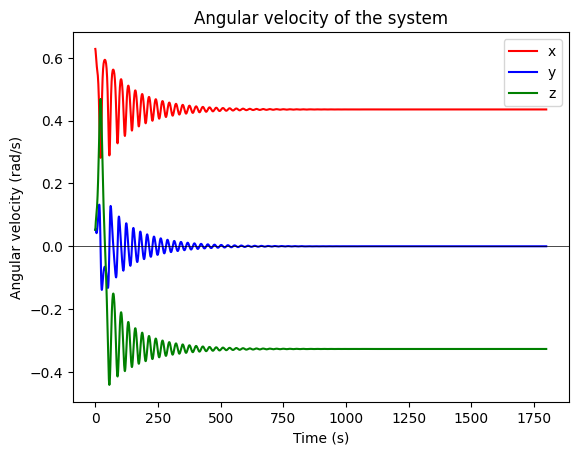

In [13]:
om1 = nu_solver.y[3:6,:]

plt.figure()

plt.plot(om1[0,:], label='x', color='red')
plt.plot(om1[1,:], label='y', color = "blue")
plt.plot(om1[2,:], label='z', color = "green")
# Plot horizontal line at 0
plt.axhline(0, color='black', lw=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.title('Angular velocity of the system')



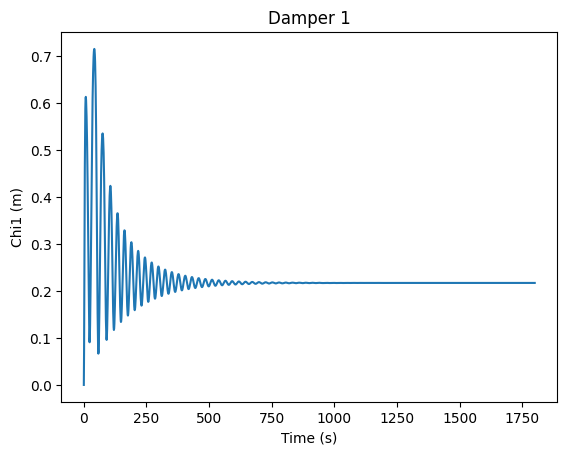

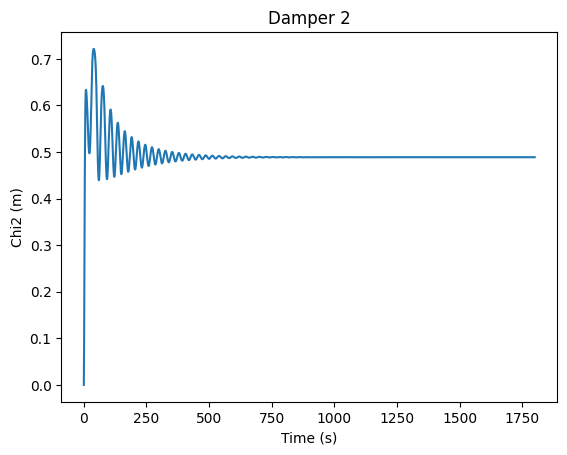

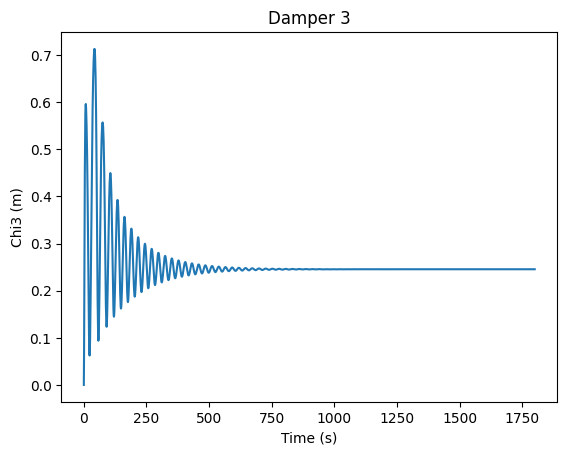

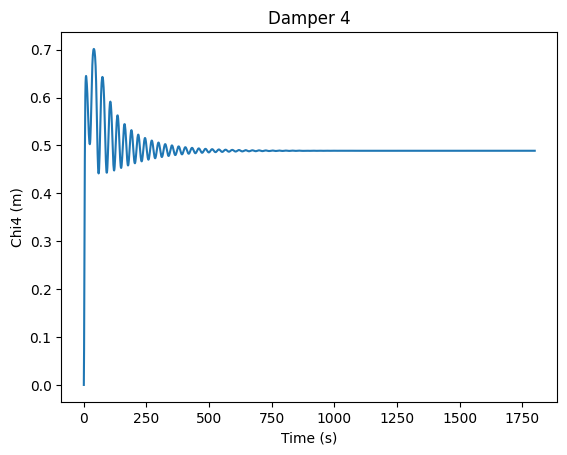

In [14]:
# chi
chi_arr = nu_solver.y[11:15,:]
for i in range(4):
    plt.figure()
    plt.plot(chi_arr[i,:])
    plt.xlabel('Time (s)')
    plt.ylabel('Chi' + str(i+1) + ' (m)')
    plt.title('Damper ' + str(i+1))


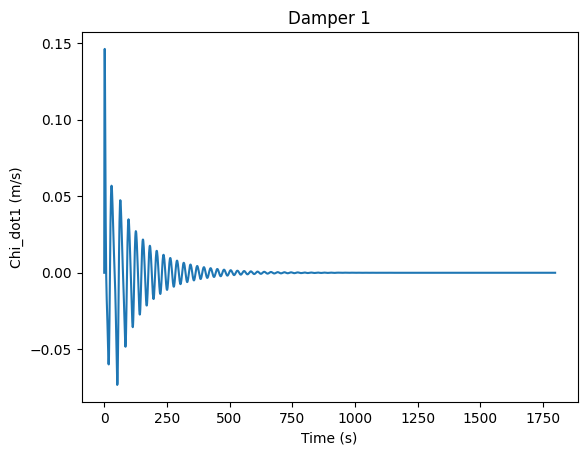

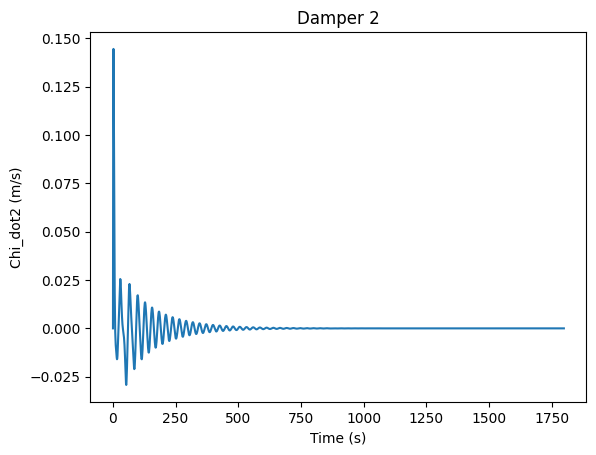

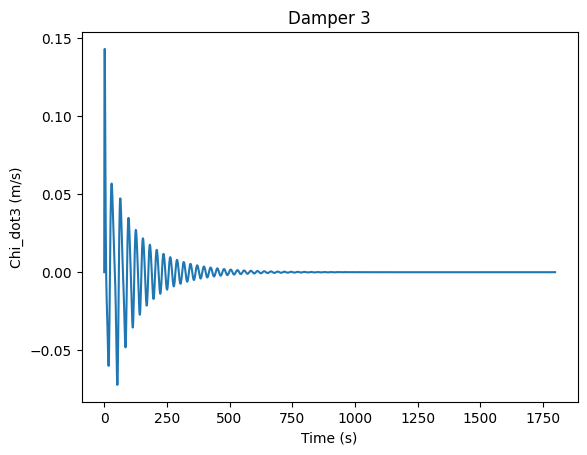

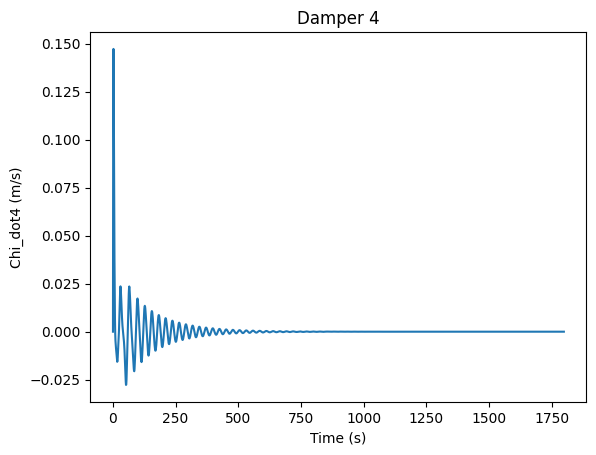

In [15]:
# chi_dot
chi_dot_arr = nu_solver.y[6:10,:]
for i in range(4):
    plt.figure()
    plt.plot(chi_dot_arr[i,:])
    plt.xlabel('Time (s)')
    plt.ylabel('Chi_dot' + str(i+1) + ' (m/s)')
    plt.title('Damper ' + str(i+1))

Text(0.5, 1.0, 'Wheel angular velocity')

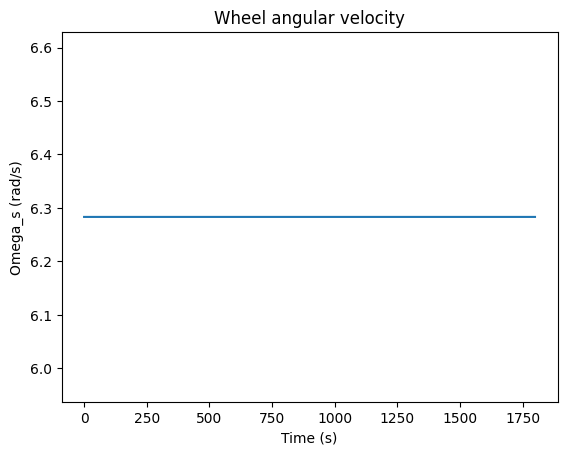

In [16]:
# om_s
plt.figure()
plt.plot(nu_solver.y[10,:])
plt.xlabel('Time (s)')
plt.ylabel('Omega_s (rad/s)')
plt.title('Wheel angular velocity')


Text(0.5, 1.0, 'Total energy of the system')

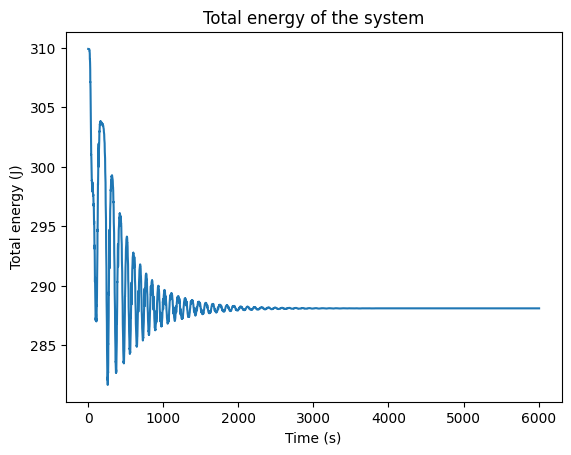

In [17]:
plt.figure()
plt.plot(T_arr)
plt.xlabel('Time (s)')
plt.ylabel('Total energy (J)')
plt.title('Total energy of the system')

Analyzing the results, we observe that the four dampers have an asintothic not-null value, meaning we do have stability but with non-null components around the intermediate and minimum inertia axis. An oddity in the plot of the angular velocities is from $\omega_3$, expected to stabilize around positive angular velocities instead of negative ones. This is proably due to some hidden bugs in the programming.

As expected, the energy decreases with time, while it oscillates due to the control of the wheel adding energy to the system.
The wheel velocity remains correctly constant at its initial value

# Case b) Viscous wheel

In [18]:
#) case b): wheel unlocked -- dissipative control
Mt = initialize_Mt()
wheel_locked = False
def diss_control(t, nu: np.ndarray):
    # This function implements the dissipative control
    # nu: state vector
    # returns: control input
    return -Kw*nu[10]
ga_control = diss_control

nu0 = np.concatenate((vp0, om0, np.zeros((4,1)), np.array([[om_s02]]), np.zeros((4,1)))) # [vP, om, chi_dot, om_s, chi]
nu0 = nu0.flatten()
T_arr = []

nu_solver2 = spi.solve_ivp(simulate_nu, (t0, tf2), nu0, method='RK45', t_eval=np.linspace(t0, tf2, tf2-t0)) # Runge-Kutta 4th/5th order, 1s step


Text(0.5, 1.0, 'Angular velocity of the system')

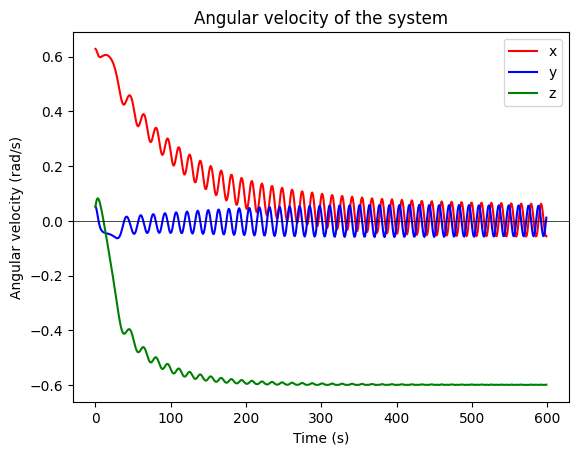

In [19]:
om2 = nu_solver2.y[3:6,:]

plt.figure()

plt.plot(om2[0,:], label='x', color='red')
plt.plot(om2[1,:], label='y', color = "blue")
plt.plot(om2[2,:], label='z', color = "green")
# Plot horizontal line at 0
plt.axhline(0, color='black', lw=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.title('Angular velocity of the system')

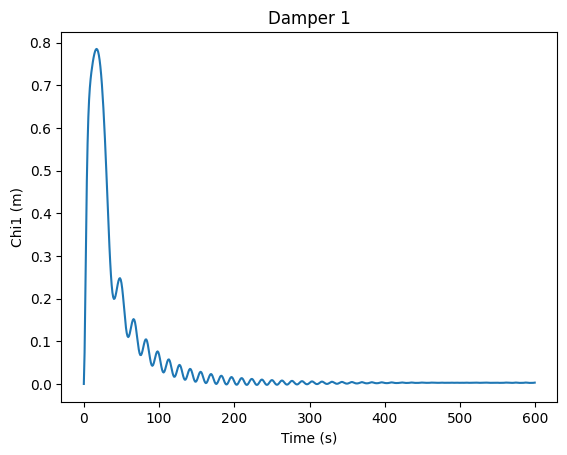

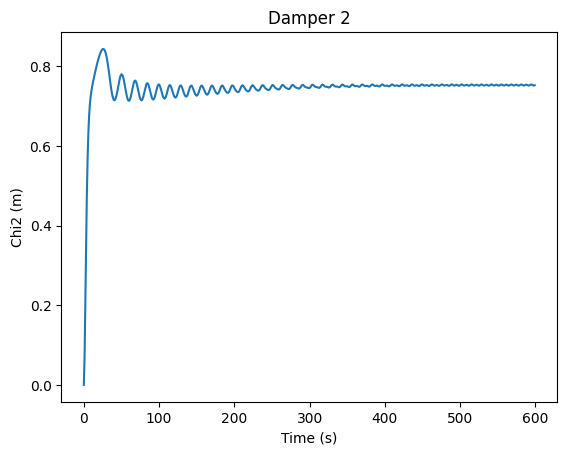

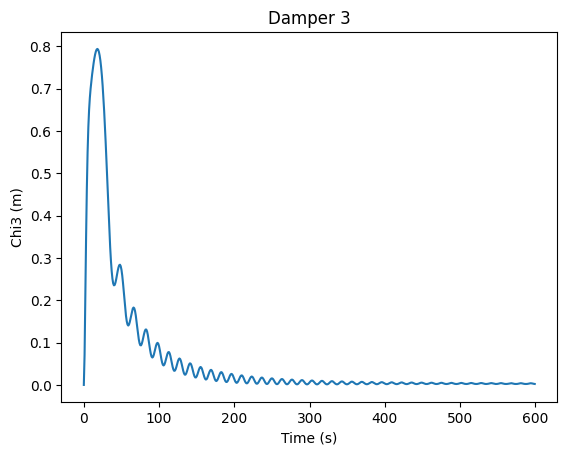

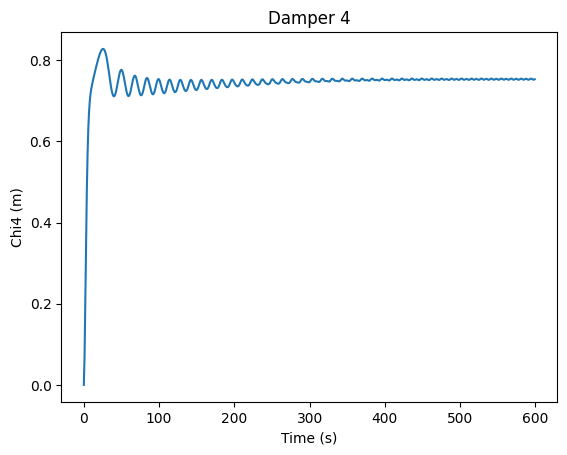

In [20]:
# chi
chi_arr = nu_solver2.y[11:15,:]
for i in range(4):
    plt.figure()
    plt.plot(chi_arr[i,:])
    plt.xlabel('Time (s)')
    plt.ylabel('Chi' + str(i+1) + ' (m)')
    plt.title('Damper ' + str(i+1))


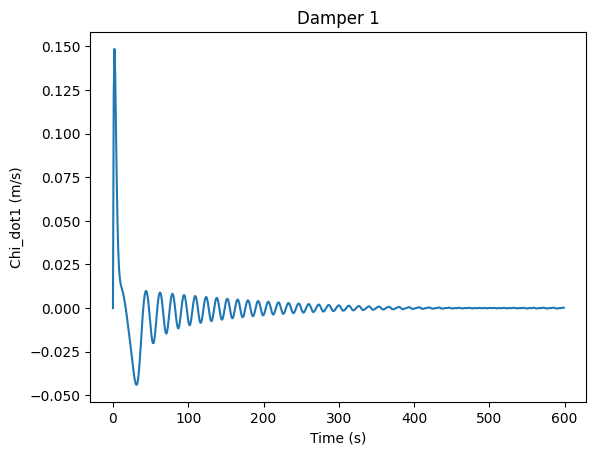

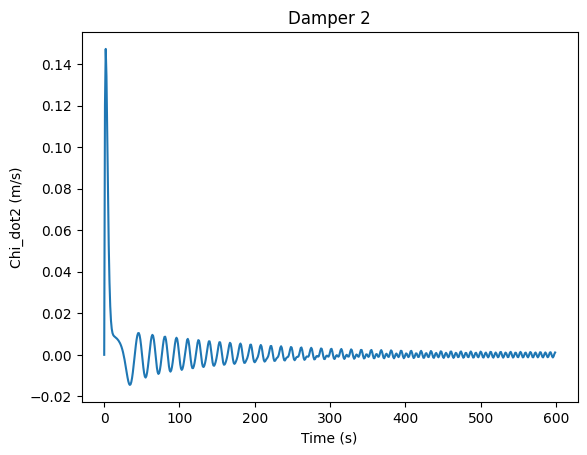

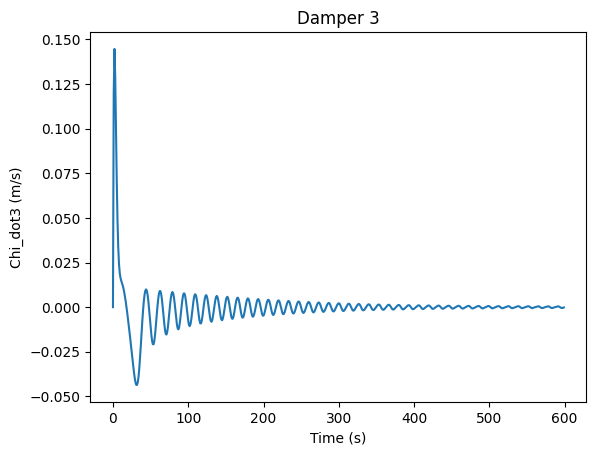

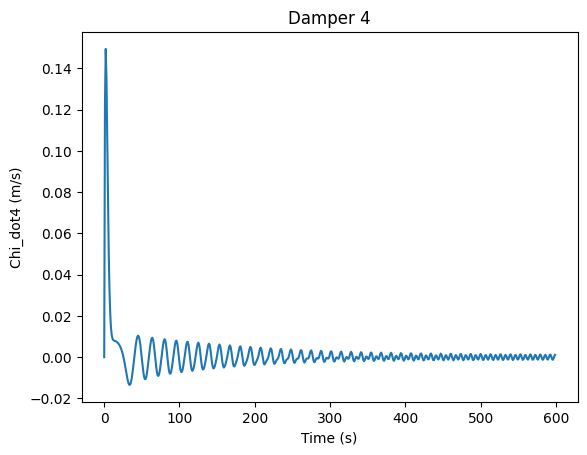

In [21]:
# chi_dot
chi_dot_arr = nu_solver2.y[6:10,:]
for i in range(4):
    plt.figure()
    plt.plot(chi_dot_arr[i,:])
    plt.xlabel('Time (s)')
    plt.ylabel('Chi_dot' + str(i+1) + ' (m/s)')
    plt.title('Damper ' + str(i+1))
    

Text(0.5, 1.0, 'Wheel angular velocity')

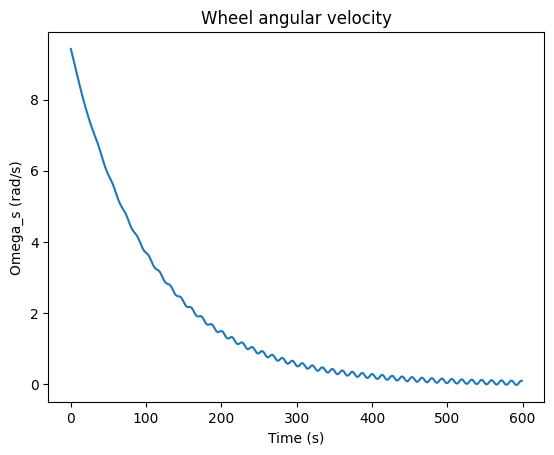

In [22]:
# om_s
plt.figure()
plt.plot(nu_solver2.y[10,:])
plt.xlabel('Time (s)')
plt.ylabel('Omega_s (rad/s)')
plt.title('Wheel angular velocity')


Text(0.5, 1.0, 'Total energy of the system')

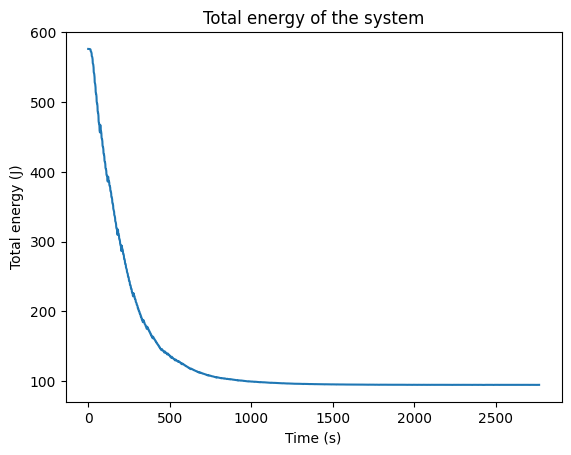

In [23]:
plt.figure()
plt.plot(T_arr)
plt.xlabel('Time (s)')
plt.ylabel('Total energy (J)')
plt.title('Total energy of the system')


Here the wheel acts a viscous ring, damping its own velocity with a control of the type -Cd*$\omega_s$.
We see how the angular velocities $\omega_1$ and $\omega_2$ quickly start converging to a zero mean velocity and the spacecraft starts to rotate around its own major inertia axis $\hat{b_3}$ (again, here we expect to se $\omega_3$ positive, but due to some bug it changes its rotation direction).

Dampers 1 and 3 (in the $b_3$ direction) arrive asintotically at rest, while 2 and 4 (in the $b_2$ direction) converge to a non null value, obtaining a non-null angular velocity components around the intermediate and minor inertia axis.

# Case c) Unlocked wheel

In [24]:
# case c): wheel unlocked -- zero control
Mt = initialize_Mt()
ga_control = lambda t, x: 0 # control function

nu0 = np.concatenate((vp0, om0, np.zeros((4,1)), np.array([[om_s01]]), np.zeros((4,1)))) # [vP, om, chi_dot, om_s, chi]
nu0 = nu0.flatten()
T_arr = []

nu_solver3 = spi.solve_ivp(simulate_nu, (t0, tf1), nu0, method='RK45', t_eval=np.linspace(t0, tf1, tf1-t0)) # Runge-Kutta 4th/5th order, 1s step

Text(0.5, 1.0, 'Angular velocity of the system')

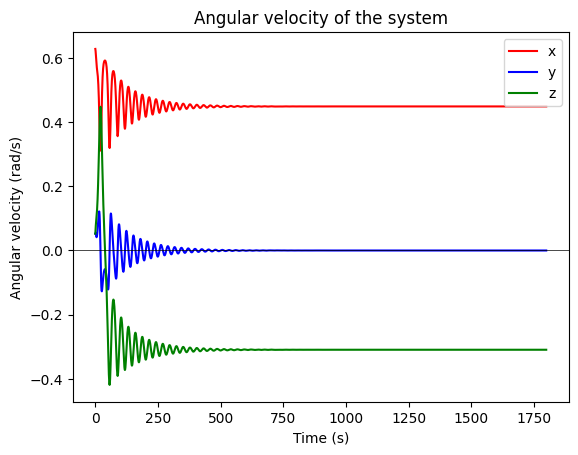

In [25]:
# om
om3 = nu_solver3.y[3:6,:]

plt.figure()

plt.plot(om3[0,:], label='x', color='red')
plt.plot(om3[1,:], label='y', color = "blue")
plt.plot(om3[2,:], label='z', color = "green")
# Plot horizontal line at 0
plt.axhline(0, color='black', lw=0.5)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.title('Angular velocity of the system')

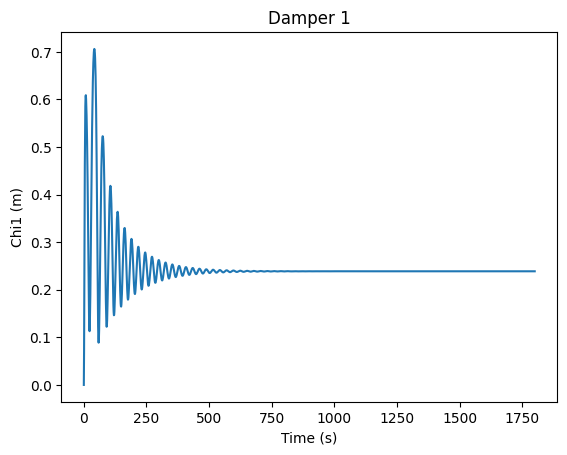

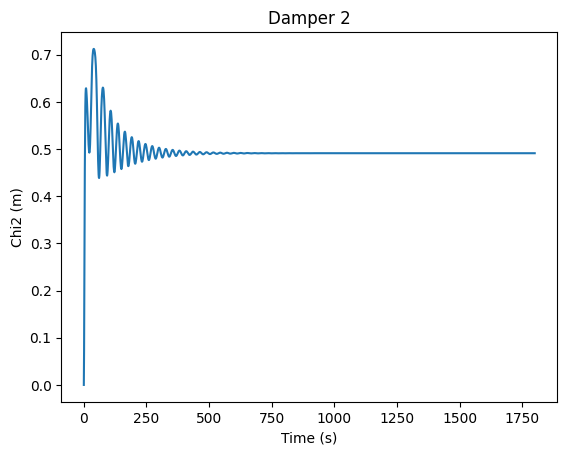

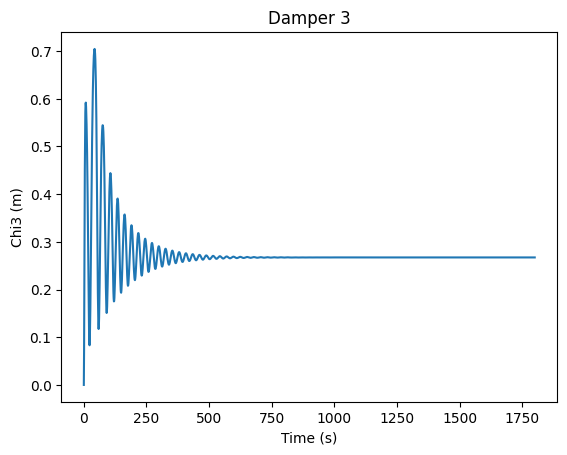

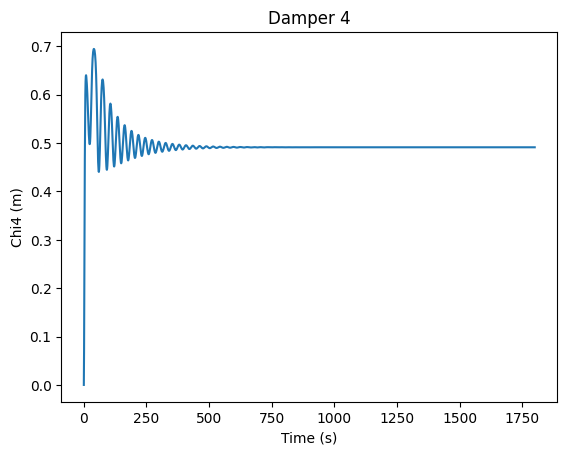

In [26]:
# chi
chi_arr = nu_solver3.y[11:15,:]
for i in range(4):
    plt.figure()
    plt.plot(chi_arr[i,:])
    plt.xlabel('Time (s)')
    plt.ylabel('Chi' + str(i+1) + ' (m)')
    plt.title('Damper ' + str(i+1))
    

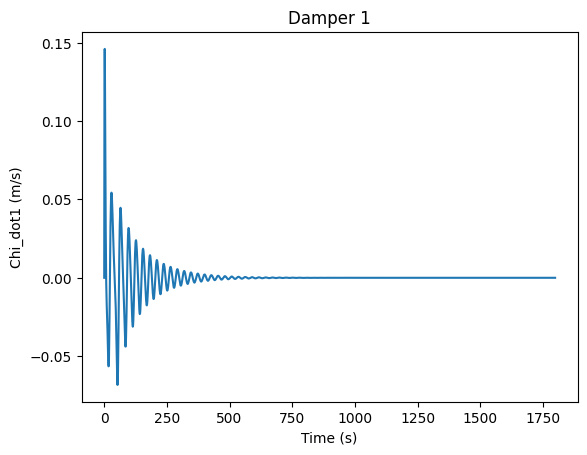

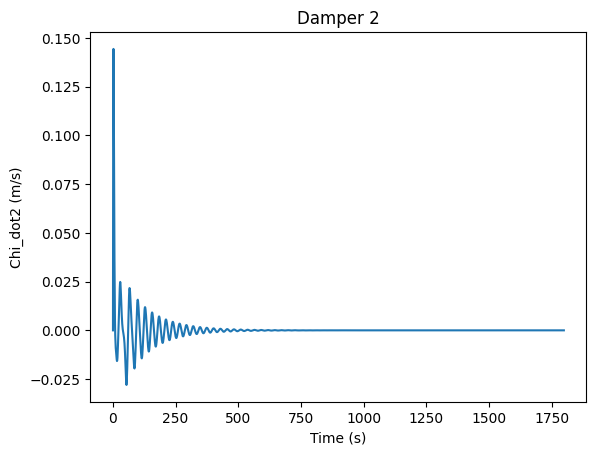

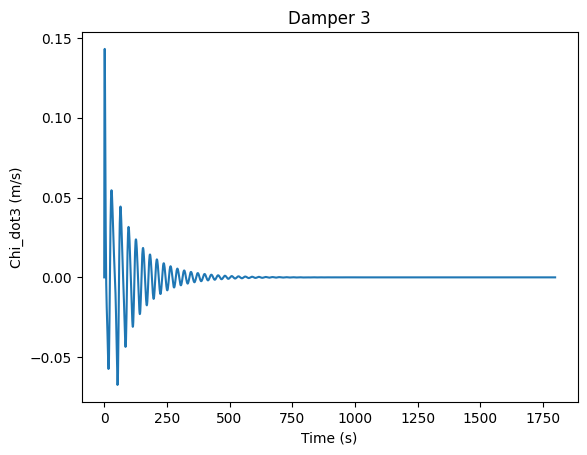

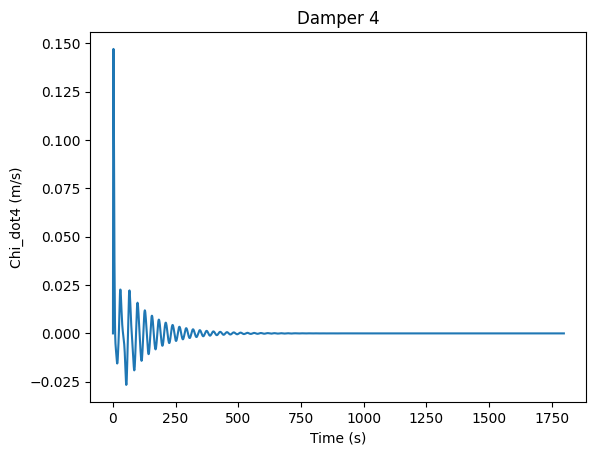

In [27]:
chi_dot_arr = nu_solver3.y[6:10,:]
for i in range(4):
    plt.figure()
    plt.plot(chi_dot_arr[i,:])
    plt.xlabel('Time (s)')
    plt.ylabel('Chi_dot' + str(i+1) + ' (m/s)')
    plt.title('Damper ' + str(i+1))

Text(0.5, 1.0, 'Wheel angular velocity')

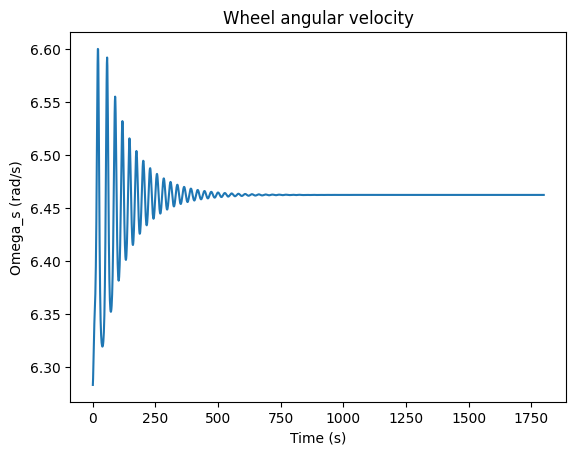

In [28]:
# om_s
plt.figure()
plt.plot(nu_solver3.y[10,:])
plt.xlabel('Time (s)')
plt.ylabel('Omega_s (rad/s)')
plt.title('Wheel angular velocity')

Text(0.5, 1.0, 'Total energy of the system')

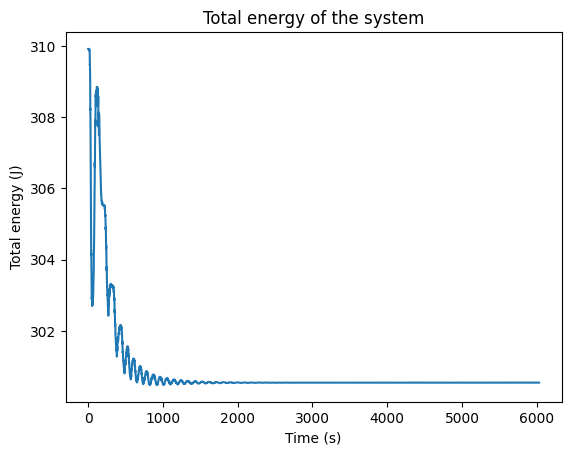

In [29]:
# Total energy
plt.figure()
plt.plot(T_arr)
plt.xlabel('Time (s)')
plt.ylabel('Total energy (J)')
plt.title('Total energy of the system')

Here we have the same situation as case a), except we do not apply any control here and the wheel is free to change its angular velocity.
By the total energy plot we already see something's not working due to the expectation of it being monotone decreasing as we're not inserting any external energy in the system. 

Same considerations apply to the angular velocities plot. $\omega_3$ still behaves badly, changing and stabilizing at negative values while a positive value is expected. 

The damper's masses arrive asintotically in positions that differ from the one of rest, meaning that we do not achieve stabilization along the major inertia axis of the angular velocities.